In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("data.log")

In [3]:
data["timestamp"] = pd.to_datetime(data["timestamp"])

In [4]:
data = data[data.model == "roberta_finetune"]
data

,timestamp,event,version,model
10,2023-12-04 13:42:20.216760,pickling start,0.0.4,roberta_finetune
11,2023-12-04 13:42:20.664533,pickling finished,0.0.4,roberta_finetune
12,2023-12-04 13:42:20.664731,sending job start,0.0.4,roberta_finetune
13,2023-12-04 13:42:32.101606,sending job finished,0.0.4,roberta_finetune
14,2023-12-04 13:42:34.925917,processing job started,0.0.4,roberta_finetune
15,2023-12-04 13:43:07.783670,processing job finished,0.0.4,roberta_finetune
16,2023-12-04 13:43:07.784017,retrieving weights from remote started,0.0.4,roberta_finetune
17,2023-12-04 13:43:22.753534,retrieving weights from remote finished,0.0.4,roberta_finetune
18,2023-12-04 13:43:22.753725,loading weights started,0.0.4,roberta_finetune
19,2023-12-04 13:43:22.886971,loading weights finished,0.0.4,roberta_finetune


In [5]:
df_merged = pd.concat([data, data.shift(-1).add_prefix("end_")], axis=1)
df_merged = df_merged.iloc[::2]
start = df_merged.iloc[0]["timestamp"]
df_merged["begin"] = (df_merged["timestamp"] - start).apply(lambda x: x.total_seconds())
df_merged["end"] = (df_merged["end_timestamp"] - start).apply(
    lambda x: x.total_seconds()
)
df_merged["event"] = df_merged["event"].apply(lambda x: " ".join(x.split(" ")[:-1]))
df_merged["duration"] = df_merged["end"] - df_merged["begin"]
df_merged.drop(
    columns=list(df_merged.filter(regex="end_")) + ["timestamp"], inplace=True
)

data = df_merged
data

,event,version,model,begin,end,duration
10,pickling,0.0.4,roberta_finetune,0.000000,0.447773,0.447773
12,sending job,0.0.4,roberta_finetune,0.447971,11.884846,11.436875
14,processing job,0.0.4,roberta_finetune,14.709157,47.566910,32.857753
16,retrieving weights from remote,0.0.4,roberta_finetune,47.567257,62.536774,14.969517
18,loading weights,0.0.4,roberta_finetune,62.536965,62.670211,0.133246


In [6]:
# plt.rcParams['image.cmap'] = "seaborn-v0_8-colorblind"
plt.style.use("seaborn-colorblind")

/tmp/ipykernel_14097/495196297.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


In [7]:
overhead_abs = data[data["event"] != "processing job"].sum()["duration"]
overhead_rel = (
    data[data["event"] != "processing job"].sum()["duration"]
    / data[data["event"] == "processing job"]["duration"]
)
overhead_rel = overhead_rel.iloc[0]
overhead_abs, overhead_rel * 100

(26.987411, 82.1340735016177)

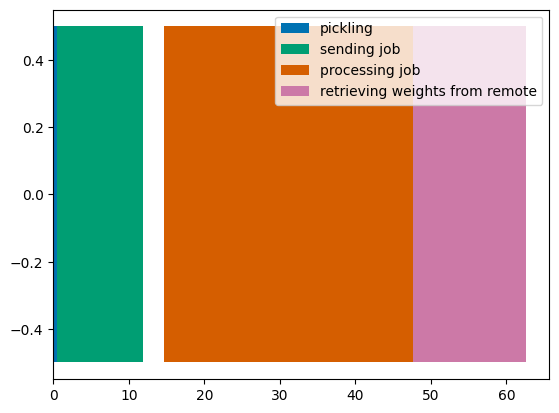

In [8]:
# plt.plot(data["timestamp"])
for index, row in data.iloc[:-1].iterrows():
    plt.barh(
        left=row["begin"], width=row["duration"], height=1, y=0, label=row["event"]
    )

plt.y
plt.legend()

<Axes: >

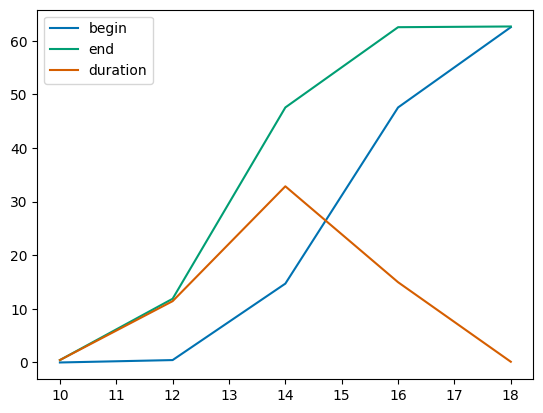

In [9]:
data.plot()